In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from datetime import datetime

[[ 1.   -6.96]
 [ 2.   -7.12]
 [ 3.   -6.62]
 [ 4.   -5.28]
 [ 5.   -5.09]
 [ 6.   -2.57]
 [ 7.   -0.82]
 [ 8.   -2.84]
 [ 9.   -2.37]
 [10.   -0.88]
 [11.   -1.98]
 [12.   -2.99]
 [13.   -4.87]
 [14.   -5.37]
 [15.   -6.35]
 [16.   -7.28]
 [17.   -5.67]
 [18.   -5.98]
 [19.   -3.98]
 [20.   -3.42]
 [21.   -2.11]
 [22.   -1.6 ]
 [23.   -2.23]
 [24.   -1.57]
 [25.   -0.61]
 [26.   -1.55]
 [27.   -1.89]
 [28.   -5.23]
 [29.   -6.68]
 [30.   -6.5 ]
 [31.   -8.45]
 [32.   -7.09]
 [33.   -5.08]
 [34.   -4.61]
 [35.   -2.85]
 [36.   -3.91]
 [37.   -2.92]
 [38.   -0.76]
 [39.   -0.06]
 [40.   -2.82]
 [41.   -2.42]]


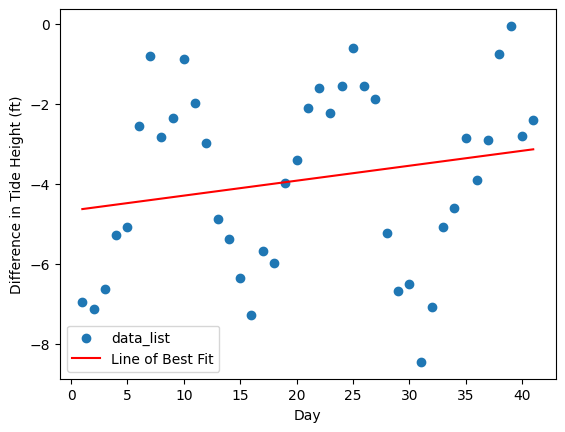

In [3]:
#this code finds the intraday differences and creates a new array with only the days and the differences of that date (result_array)
#plots it with x-axis as the day and y-axis as the differences
#creates a line of best fit for all of the points

def parse_time(time_str):
    return datetime.strptime(time_str, "%H:%M")

def calculate_difference(data):
    result = []
    for i in range(0, len(data), 2):
        day = int(data[i][0])
        time1 = parse_time(data[i][1])
        tide_height1 = float(data[i][2])
        time2 = parse_time(data[i + 1][1])
        tide_height2 = float(data[i + 1][2])
        difference = tide_height2 - tide_height1
        result.append((day, difference))
    return result

#specify the file name
filename = 'project_data.txt'

#initialize an empty list to store the data
data_list = []



#read the file and split each line into a list
with open(filename, 'r') as file:
    #skip the first three lines (header lines)
    for _ in range(3):
        next(file)
    for line in file:
        #split the line by whitespace and convert numeric values to float
        values = [float(val) if val.replace('.', '', 1).isdigit() else val for val in line.split()]
        data_list.append(values)



#calculate the difference in intraday tide heights
result = calculate_difference(data_list)

#create a new array with only the day and difference
result_array = np.array(result)


print(result_array)
#convert the time strings to numerical values (in hours)
time_values = result_array[:, 0]

#extract tide height data
tide_heights = result_array[:, 1].astype(float)

#fit a polynomial (line of best fit) to the data
coefficients = np.polyfit(time_values, tide_heights, 1)
polyfit_model = np.poly1d(coefficients)

#plot the data_array and the fitted model
plt.scatter(time_values, tide_heights, label='data_list')
plt.plot(time_values, polyfit_model(time_values), label='Line of Best Fit', color='red')
plt.xlabel('Day')
plt.ylabel('Difference in Tide Height (ft)')
plt.legend()
plt.savefig('tidal_model.pdf')
plt.show()

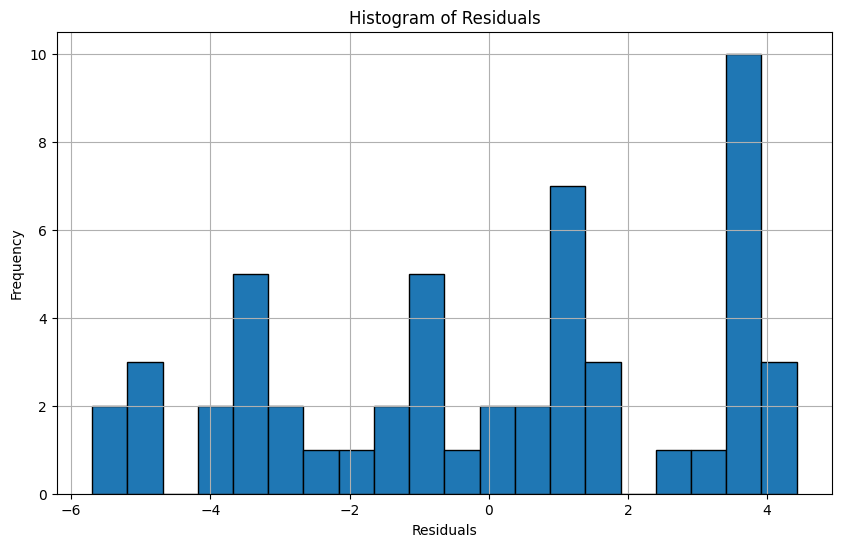

Standard Deviation of Residuals: 3.0242610890948165


In [19]:
#calculate the residuals
residuals = tide_heights - polyfit_model(time_values)

#create a histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig('residuals_histogram.pdf')
plt.show()

std_dev = np.std(residuals)
print(f'Standard Deviation of Residuals: {std_dev}')

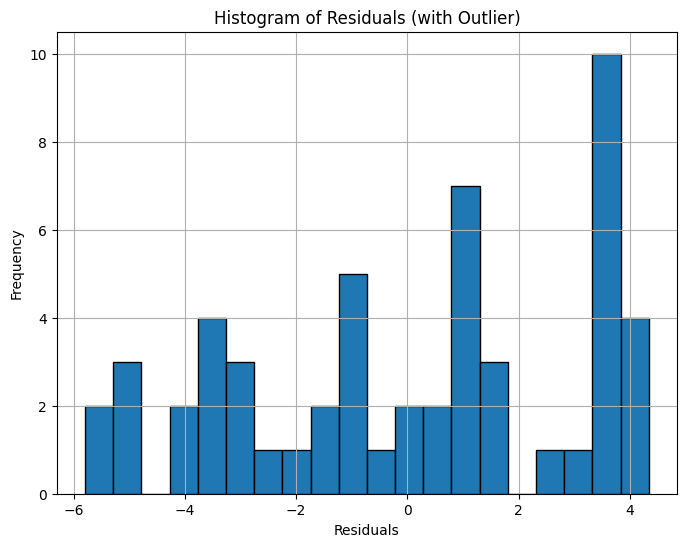

Standard Deviation of Residuals: 3.0549374478279474
Z-Score of the Outlier: 0.6546778892058801


In [20]:
outlier_day = 16
outlier_difference = 2.0
outlier = (outlier_day, outlier_difference)

result.append(outlier)
result_array = np.array(result)

#convert the time strings to numerical values (in hours)
time_values = result_array[:, 0]

#extract tide height data
tide_heights = result_array[:, 1].astype(float)

#fit a polynomial (line of best fit) to the updated data
coefficients = np.polyfit(time_values, tide_heights, 1)
polyfit_model = np.poly1d(coefficients)

#calculate the residuals
residuals = tide_heights - polyfit_model(time_values)

#create a histogram of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, edgecolor='black')
plt.title('Histogram of Residuals (with Outlier)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


#finds the std dev of the histogram with outliers
std_dev = np.std(residuals)
print(f'Standard Deviation of Residuals: {std_dev}')


#finds the deviation of the outlier from the mean
z_score_outlier = (outlier_difference - np.mean(residuals)) / std_dev
print(f'Z-Score of the Outlier: {z_score_outlier}')